<a href="https://colab.research.google.com/github/Thuthur69/arthur/blob/main/exercice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd '/content/drive/MyDrive/cats_and_dogs/train'

/content/drive/MyDrive/cats_and_dogs/train


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2


resnet = ResNet50V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in resnet.layers:
  layer.trainable = False

model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/train', target_size=(224, 224), batch_size=32, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs/test', target_size=(224, 224), batch_size=32, class_mode='binary')




Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


Epoch 1/10
18/18 [==============================] - 162s 9s/step - loss: 2.8047 - accuracy: 0.8456 - val_loss: 2.1382 - val_accuracy: 0.8857
Epoch 2/10
18/18 [==============================] - 138s 8s/step - loss: 0.8623 - accuracy: 0.9515 - val_loss: 0.3381 - val_accuracy: 0.9571
Epoch 3/10
18/18 [==============================] - 137s 8s/step - loss: 0.2894 - accuracy: 0.9713 - val_loss: 1.0841 - val_accuracy: 0.9071
Epoch 4/10
18/18 [==============================] - 150s 8s/step - loss: 0.0793 - accuracy: 0.9856 - val_loss: 0.2729 - val_accuracy: 0.9500
Epoch 5/10
18/18 [==============================] - 160s 9s/step - loss: 0.0292 - accuracy: 0.9946 - val_loss: 0.2440 - val_accuracy: 0.9643
Epoch 6/10
18/18 [==============================] - 154s 9s/step - loss: 0.0055 - accuracy: 0.9964 - val_loss: 0.6075 - val_accuracy: 0.9214
Epoch 7/10
18/18 [==============================] - 153s 9s/step - loss: 0.0272 - accuracy: 0.9928 - val_loss: 0.4770 - val_accuracy: 0.9214
Epoch 8/10
18

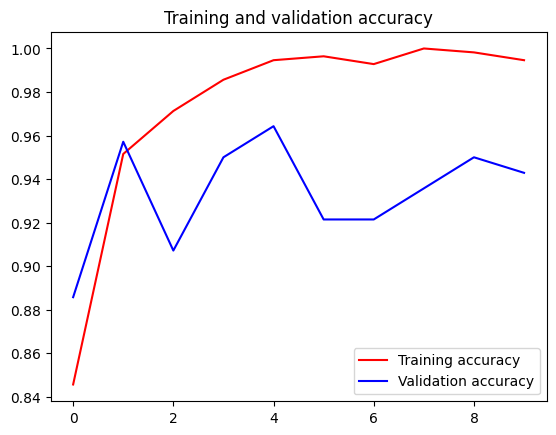

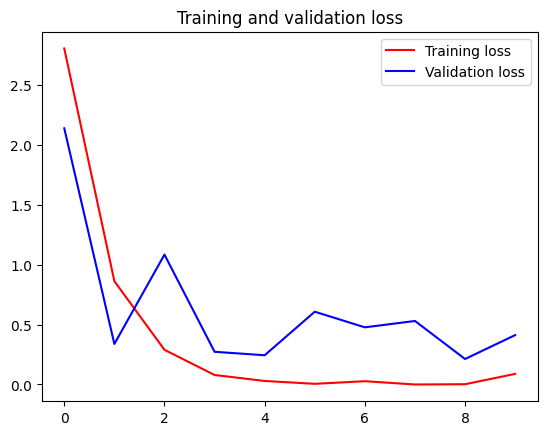

In [15]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=valid_generator, validation_steps=len(valid_generator))

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(valid_generator)

# Get the true labels and predicted labels for the test set
y_true = valid_generator.classes
y_pred = model.predict(valid_generator).argmax(axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

5/5 [==============================] - 25s 5s/step
Confusion Matrix:
[[70  0]
 [70  0]]


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(valid_generator)
y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(cm)

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


5/5 [==============================] - 24s 5s/step
Confusion matrix:
[[32 38]
 [32 38]]
Accuracy: 0.5
Precision: 0.5
Recall: 0.5428571428571428
F1-score: 0.5205479452054795


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False)
for layer in base_model.layers:
    layer.trainable = False

train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        f'/content/drive/MyDrive/cats_and_dogs/train',
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

valid_generator = train_datagen.flow_from_directory(
        f'/content/drive/MyDrive/cats_and_dogs/train',
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        f'/content/drive/MyDrive/cats_and_dogs/test',
        target_size=(300, 300),
        batch_size=16,
        shuffle=False)

train_dir = '/content/drive/MyDrive/cats_and_dogs/train'
valid_dir = '/content/drive/MyDrive/cats_and_dogs/train'
test_dir = '/content/drive/MyDrive/cats_and_dogs/test'

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

model.fit(train_generator, epochs=10, validation_data=valid_generator)

score = model.evaluate(test_generator)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Found 557 images belonging to 2 classes.
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 557 images belonging to 2 classes.
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 257s 15s/step - loss: 0.0137 - accuracy: 0.9946 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 252s 14s/step - loss: 0.1295 - accuracy: 0.9856 - val_loss: 0.0136 - val_accuracy: 0.9982
Epoch 3/10
 5/18 [=======>......................] - ETA: 1:21 - loss: 0.0406 - accuracy: 0.9937